In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [55]:
# Load
data = pd.read_csv('./../../Datasets/wisconsin_breast_cancer.csv')
data.shape

(699, 11)

In [56]:
# Deleting unused columns 
data.drop(data.columns[0], axis=1, inplace=True)
data.head()

,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


In [57]:
# Duplicates, keep for now
data.duplicated().sum()

236

In [58]:
# Missing values
data.dropna(axis=0, inplace=True)
data.isnull().sum()

thickness    0
size         0
shape        0
adhesion     0
single       0
nuclei       0
chromatin    0
nucleoli     0
mitosis      0
class        0
dtype: int64

In [59]:
data.dtypes

thickness      int64
size           int64
shape          int64
adhesion       int64
single         int64
nuclei       float64
chromatin      int64
nucleoli       int64
mitosis        int64
class          int64
dtype: object

In [60]:
matrix = data.corr()
matrix.style.background_gradient(cmap='viridis')

,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
single,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
mitosis,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


In [61]:
X = data.drop('class', axis=1)
y = data['class']

In [62]:
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [63]:
def run_classifier(k_):
    classifier = KNeighborsRegressor(n_neighbors=k_, metric='euclidean', algorithm='auto')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return [k_, r2]


In [64]:
results = np.array([run_classifier(k) for k in range(3,31,2)])

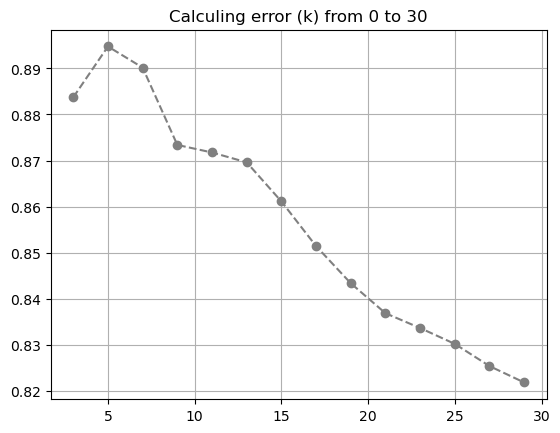

In [65]:
xaxis = results.T[0]
yaxis = results.T[1]

plt.plot(xaxis, yaxis, linestyle='dashed', color='gray', marker='o')
plt.grid(visible=True)
plt.title("Calculing error (k) from 0 to 30")
plt.show()